# Домашнее задание №10. Классификация
Во всех заданиях можно использовать существующие модели, например, из библиотеки <code>sklearn</code>, либо реализовать модель самостоятельно.

## Задание 1
В этом задании понадобится подготовленный в домашнем задании №5 датасет Titanic.

Воспользуйтесь одной из рассмотренных на последних двух лекциях и семинарах моделью для предсказания того, выжил ли пассажир.

Выведите точность на тестовой выборке.

In [ ]:
# Напишите свой код в данной ячейке
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("train.csv")
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = df.select_dtypes(include=['number'])
df.fillna(df.mean(), inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,7.2500
1,2,1,1,1,38.000000,1,0,71.2833
2,3,1,3,1,26.000000,0,0,7.9250
3,4,1,1,1,35.000000,1,0,53.1000
4,5,0,3,0,35.000000,0,0,8.0500
5,6,0,3,0,29.699118,0,0,8.4583
6,7,0,1,0,54.000000,0,0,51.8625
7,8,0,3,0,2.000000,3,1,21.0750
8,9,1,3,1,27.000000,0,2,11.1333
9,10,1,2,1,14.000000,1,0,30.0708


In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение логистической регрессии
model = LogisticRegression(max_iter=250,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f} ")

Точность модели: 0.81 


## Задание 2
Для результатов предыдущего задания постройте ROC кривую, а также выведите значение ROC-AUC.

ROC-AUC: 0.87


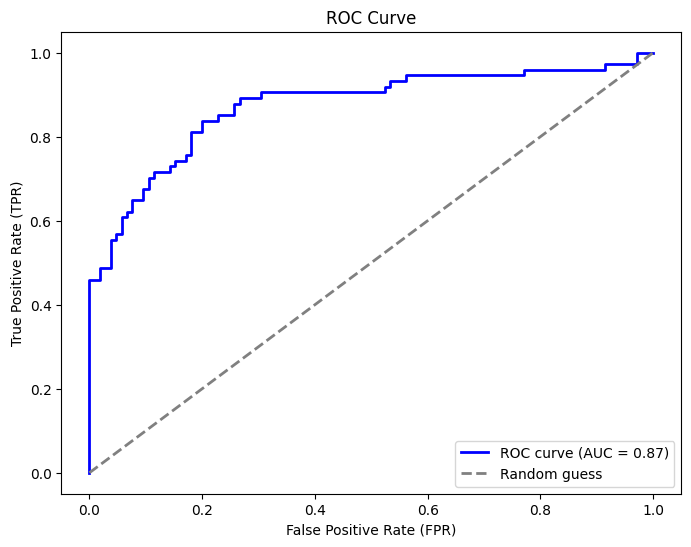

In [11]:
# Напишите свой код в данной ячейке
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# model.predict_proba возвращает вероятности для каждого класса
# [:, 1] выбирает вероятности для положительного класса (класс 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Вероятности положительного класса

# Вычисление FPR (False Positive Rate), TPR (True Positive Rate) и порогов
# roc_curve принимает истинные метки (y_test) и предсказанные вероятности (y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычисление ROC-AUC (Area Under Curve)
# roc_auc_score вычисляет площадь под ROC-кривой, что является метрикой качества модели
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

![alt text](slide-26.jpg)

## Задание 3

В следующих двух заданиях нужно будет работать с датасетом Iris. Загрузить его можно так:

In [12]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
iris = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis = 1), columns = iris.feature_names + ['target'])
print(iris.head(101))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
96                 5.7               2.9                4.2               1.3   
97                 6.2               2.9                4.3               1.3   
98                 5.1               2.5                3.0               1.1   
99                 5.7               2.8                4.1               1.3   
100                6.3               3.3                6.0               2.5   

     target  
0       0.0  

Описание датасета можно найти, например, [здесь](https://scikit-learn.ru/stable/datasets/toy_dataset.html#iris-dataset).

Выберите какие-нибудь два признака и обучите модель классификации для предсказания класса цветка.

Выведите точность на тестовой выборке. Постройте график, выделив цветами классифицированные области, например, при помощи <code>sklearn.inspection.DecisionBoundaryDisplay</code>.

Точность SVC-модели на тестовой выборке (accuracy_score): 0.90


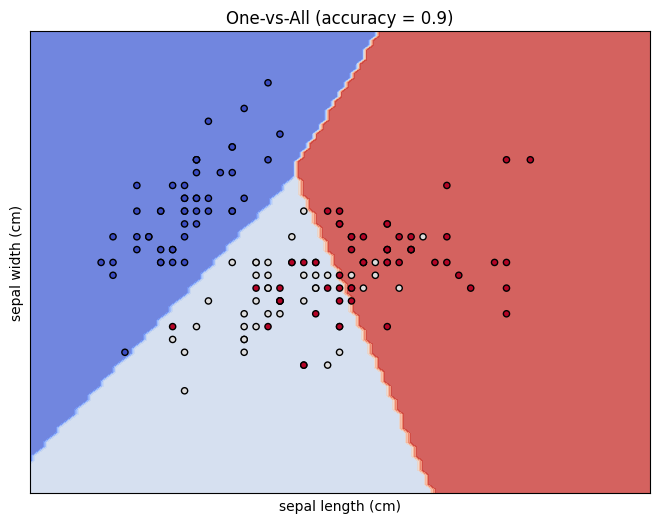

In [ ]:
# Напишите свой код в данной ячейке
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

y = iris['target']
features = ['sepal length (cm)', 'sepal width (cm)']
X = pd.get_dummies(iris[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = "linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность SVC-модели на тестовой выборке (accuracy_score): {accuracy:.2f}')

fig, ax = plt.subplots(figsize=(8, 6))
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(model,
                                              X_test,
                                              cmap=plt.cm.coolwarm,
                                              alpha=0.8,
                                              ax=ax)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("One-vs-All" + f" (accuracy = {accuracy_score(y_test, model.predict(X_test))})")
plt.show()

## Задание 4

Используйте теперь все признаки для обучения той же модели. Выведите точность на тестовой выборке.

In [14]:
# Напишите свой код в данной ячейке
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score


y = iris['target']
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = pd.get_dummies(iris[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = "linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность SVC-модели на тестовой выборке (accuracy_score): {accuracy:.2f}')

Точность SVC-модели на тестовой выборке (accuracy_score): 1.00
